In [1]:
pip install scikit-learn==0.22.1

     |████████████████████████████████| 7.1MB 9.4MB/s eta 0:00:01
     |████████████████████████████████| 296kB 14.0MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyclustertend import hopkins
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import sklearn as skl
print(skl.__version__)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import cluster

0.22.1


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

STEP 1<br/>
a 读数据<br/>
b 数据预处理<br/>
c 评估聚类趋势（看是否为非随机分布，即是否可聚类）<br/>

STEP 3
确定簇数<br/>
经验法：k= sqrt(n/2)<br/>
肘（elbow）方法：计算簇内方差和var(k) 绘制var关于k的曲线，第一个拐点即为簇数<br/>
根据需求确定簇数

STEP 4<br/>
建模、训练

STEP 5<br/>
测定聚类质量<br/>
有监督：<br/>
&nbsp;&nbsp;Jarrcard系数（JC） [0, 1] 越大越好<br/> 
&nbsp;&nbsp;FMI指数 [0, 1] 越大越好<br/>
&nbsp;&nbsp;Rand指数 [0, 1] 越大越好<br/>
&nbsp;&nbsp;BCubed精度和召回率<br/>

无监督：计算类内聚集和类间离散程度<br/>
&nbsp;&nbsp;DB指数（DBI）越小越好<br/> 
&nbsp;&nbsp;Dunn指数（DI）越大越好<br/>
&nbsp;&nbsp;轮廓指数（Silhouette coefficent）[-1, 1]越大越好

<img src="data/model.png">

<img src="data/usecase.png">

<img src="data/cheat-sheet.png">

典型应用：<br/>
&nbsp;&nbsp;客户细分<br/>
&nbsp;&nbsp;销售片区划分<br/>
&nbsp;&nbsp;聚类投资对象，确定分类标准

In [6]:
df = pd.read_csv("data/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# 转化为数值标签
le = preprocessing.LabelEncoder()
le.fit(df['species'])
print(le.classes_)
df['species'] = le.transform(df['species'])
df.groupby(['species']).count()
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
x = preprocessing.scale(x)

In [9]:
np.random.seed(12)
np.random.shuffle(x)
np.random.seed(12)
np.random.shuffle(y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
hopkins(x,150) # 远离0.5，接近0，说明非随机分布

0.17836564008379036

In [11]:
# split train set, test set and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(len(x_train))
print(len(y_train))

112
112


Kmeans

In [41]:
# 通过迭代把数据对象划分到不同的簇中，以求目标函数最小化，从而使生成的簇尽可能地紧凑和独立。
# 优点：算法简单易懂，处理大数据集，该算法保持可伸缩性和高效性
# 缺点：k的估值较难，受到初始k个点的影响落入局部最优，慢，对噪声和孤立点敏感，不适用于发现非凸形状的簇或者大小差别很大的簇
# 注意：维数过多可能导致维数过大，因此需要先降维
clst = cluster.KMeans(n_clusters=3, random_state=0)
clst.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [42]:
# 有监督
labels_pred = clst.labels_
labels_true = y
print('Adjust Rand: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('FMI: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))
# 无监督
# print('DBI: ', metrics.davies_bouldin_score(X, labels))
# print('silhouette_score: ')silhouette_score(X, labels, metric='euclidean') # metric是用于选择不同的距离函数

Adjust Rand:  0.6201351808870379
FMI:  0.7452105043132992


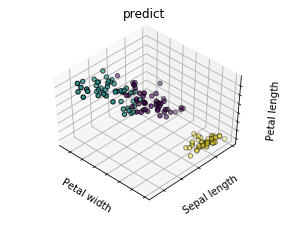

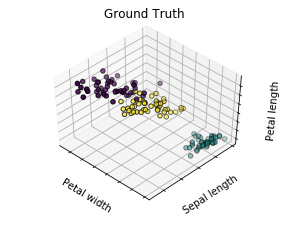

In [61]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = clst.labels_
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('predict')
ax.dist = 12

fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

BIRTH

In [16]:
# 首先遍历一次数据集，建立一颗 CF树，第二次遍历时采用可选的聚类算法对 CF树的叶子节点进行聚类，把洗漱的簇当作离群点删除，稠密的簇合并为更大的簇
# CF 树建立过程：
# 1. 从根节点向下寻找和新样本距离最近的叶子节点和叶子节点里最近的CF节点
# 2. 如果新样本加入后，这个CF节点对应的超球体半径仍然满足小于阈值T，则更新路径上所有的CF三元组，插入结束。否则转入3
# 3. 如果当前叶子节点的CF节点个数小于阈值L，则创建一个新的CF节点，放入新样本，将新的CF节点放入这个叶子节点，更新路径上所有的CF三元组，插入结束。否则转入4
# 4.将当前叶子节点划分为两个新叶子节点，选择旧叶子节点中所有CF元组里超球体距离最远的两个CF元组，分布作为两个新叶子节点的第一个CF节点。将其他元组和新样本元组按照距离远近原则放入对应的叶子节点。依次向上检查父节点是否也要分裂，如果需要按和叶子节点分裂方式相同。
# 优点：节约内存，聚类速度快，可以识别噪音点,可处理大型数据集,可增量聚类
# 缺点：对高维特征的数据聚类效果不好。此时可以选择Mini Batch K-Mean，如果数据集的分布簇不是类似于超球体则效果不好，参数问题
# 适合维度少（<20）分类多的情况
# clst = cluster.Birch()
clst = cluster.Birch(n_clusters=cluster.KMeans(n_clusters=3, random_state=0)) # 比上一行代码要好一点
clst.fit(x)

Birch(branching_factor=50, compute_labels=True, copy=True,
      n_clusters=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=0, tol=0.0001,
                        verbose=0),
      threshold=0.5)

In [17]:
# 有监督
labels_pred = clst.labels_
labels_true = y
print('Adjust Rand: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('FMI: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Adjust Rand:  0.580252001964217
FMI:  0.7183463130184203


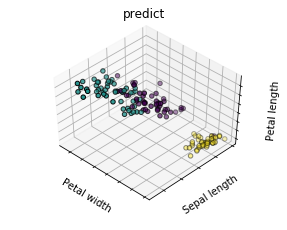

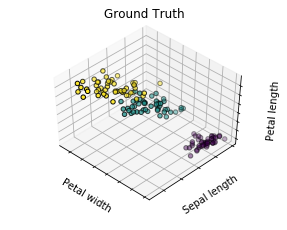

In [18]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = clst.labels_
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('predict')
ax.dist = 12

fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

DBSCAN

In [39]:
# 通过将紧密相连的样本划为一类，这样就得到了一个聚类类别。通过将所有各组紧密相连的样本划为各个不同的类别，则我们就得到了最终的所有聚类类别结果。
# 优点： 可以对任意形状的稠密数据集进行聚类、对数据集中的异常点不敏感、初始值对聚类结果没有影响
# 缺点：如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差，这时用DBSCAN聚类一般不适合、不适宜大数据集调参麻烦
clst = cluster.DBSCAN(eps=1.5, min_samples=2)
clst.fit(x)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [42]:
# 有监督
labels_pred = clst.labels_
labels_true = y
n_clusters_ = len(set(labels_pred)) - (1 if -1 in labels_pred else 0)
n_noise_ = list(labels_pred).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Adjust Rand: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('FMI: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Estimated number of clusters: 2
Estimated number of noise points: 0
Adjust Rand:  0.5681159420289855
FMI:  0.7714542762891773


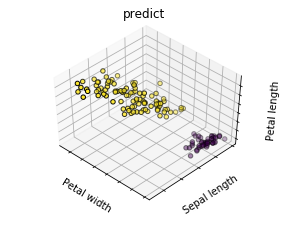

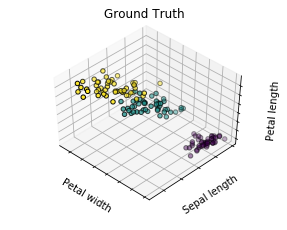

In [38]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = clst.labels_
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('predict')
ax.dist = 12

fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

In [68]:
clst = cluster.OPTICS(min_samples=2)
clst.fit(X)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=11, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [69]:
# 有监督
labels_pred = clst.labels_
labels_true = y
n_clusters_ = len(set(labels_pred)) - (1 if -1 in labels_pred else 0)
n_noise_ = list(labels_pred).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Adjust Rand: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('FMI: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Estimated number of clusters: 3
Estimated number of noise points: 22
Adjust Rand:  0.39898281304805333
FMI:  0.6448946555739685


In [11]:
# 谱聚类
# 。它的主要思想是把所有的数据看做空间中的点，这些点之间可以用边连接起来。距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高，
# 通过对所有数据点组成的图进行切图，让切图后不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高，从而达到聚类的目的。
# https://www.cnblogs.com/pinard/p/6221564.html
# 优点： 谱聚类只需要数据之间的相似度矩阵，因此对于处理稀疏数据的聚类很有效、由于使用了降维，因此在处理高维数据聚类时的复杂度比传统聚类算法好。
# 缺点： 如果最终聚类的维度非常高，则由于降维的幅度不够，效果不好
# 比起 kmeans，这个应该优先考虑
clst = cluster.SpectralClustering(n_clusters=3, assign_labels="discretize",random_state=0)
clst.fit(x)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=3, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

In [12]:
# 有监督
labels_pred = clst.labels_
labels_true = y
n_clusters_ = len(set(labels_pred)) - (1 if -1 in labels_pred else 0)
n_noise_ = list(labels_pred).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Adjust Rand: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('FMI: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Estimated number of clusters: 3
Estimated number of noise points: 0
Adjust Rand:  0.6410058621782706
FMI:  0.759080404248551


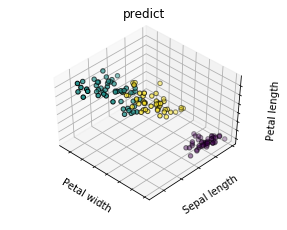

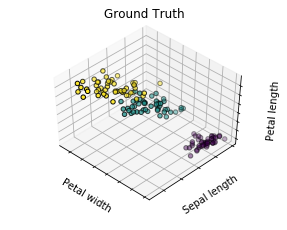

In [13]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = clst.labels_
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('predict')
ax.dist = 12

fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12